
# Recurrent Neural Networks with Top-k Gains for Session-based Recommendations

# Sommaire
* [INTRODUCTION](#intro)
* [présentation de l'article de référence (sus-cité) et le nouvel algortihme dévellopé par les auteurs](#pres_auteur)
* [Nouvel algorithme développé par les auteurs](#nouvel_algo)
    * [Algorithme d'échantillonnage](#algo_echant)
    * [Nouvelles fonctions de perte](#nouvel_perte)
* [Principaux résultats des auteurs](#resultats)
* [Implémentation de l'article](#imple)  
    * [Présentation du jeu de données utilisé](#data)
    * [Expérimentations](#experi)

    * [importation des librairies utiles](#package)
    * [Préprocessing des données](#predata)
    * [Expérimentations](#experiment)
    * [Prise en main des données](#pem)
    * [Fonctions de perte](#fdp)
    * [Optimiseurs](#op)
    * [Modèle](#mod)
    * [Métriques](#metrique)
    * [Fonction d'entrainement et Evaluation](#train_eval)
* [Conclusion](#conclusion)

 

<a class="anchor" id="tada"></a>

## INTRODUCTION <a class="anchor" id="intro"></a>
Les systèmes de recommandation sont une forme spécifique de filtrage de l'information visant à présenter les éléments d'information qui sont susceptibles d'intéresser l'utilisateur. Ainsi, les systèmes de recommandation sont des algorithmes dont le but est de faire des suggestions pertinentes à l'usager. L’émergence de l’apprentissage automatique (machine learning) avec les technologies du big data et les hautes performances informatiques et de communication offrent de nouvelles perspectives. Ces perspectives permettent entre autres de comprendre et de faire des recommandations dans des processus très gourmands en données et d'affiner les différentes stratégies des parties prenantes telles que les plateformes de streaming ou encore des ventes en ligne(e-commerce). Les entreprises telles que Netflix et autres, utilisent ce système très efficace basé sur des algorithmes pour faire des suggestions de films/series aux utilisateurs et d'être extrêmement concurrentielles. On distingue deux grandes familles de méthodes pour construire un système de recommandation:
- les méthodes par filtrage collaboratif;
- les méthodes basées sur le contenu.

Les méthodes collaboratives pour les systèmes de recommandation sont des méthodes qui se basent uniquement sur les interactions passées enregistrées entre les utilisateurs et les éléments afin de produire de nouvelles recommandations. Ces interactions sont stockées dans la "matrice des interactions entre utilisateurs et articles". L'idée principale qui régit les méthodes collaboratives est que ces interactions passées entre utilisateurs et articles sont suffisantes pour détecter des utilisateurs similaires et/ou des articles similaires et faire des prédictions basées sur ces proximités estimées. Contrairement aux méthodes de collaboration qui reposent uniquement sur les interactions entre l'utilisateur et l'article, les approches basées sur le contenu utilisent des informations supplémentaires sur les utilisateurs et/ou les articles. L'idée derrière ces méthodes est de construire un modèle, basé sur les "caractéristiques" disponibles, qui expliquent les interactions observées entre l'utilisateur et les articles. Par exemple, si nous voulons faire des recommandations sur un site de vente en ligne nous pouvons ajouter des variables comme le sexe du visiteur, son age, sa profession... 

Cependant ces deux familles ont une principale limite: elles sont incapables de faire une recommandation lorsqu'il s'agit d'un nouvel utilisateur. Un utilisateur qui n'a pas d'historique. une solution triviale à ce problème est de faire le item-to-item approche. Avec cette approche on recommande à l'utilisateur des articles qui sont similaires. D'autres solutions ont été dévellopées, la solution d'intérêt dans ce travail est la solution basée sur les réseaux de neuronnes récurents (RNN) dévellopée dans l'article **SESSION-BASED RECOMMENDATIONS WITH RECURRENT NEURAL NETWORKS**.  Les RNN sont réputés pour leur excellente habilité à modéliser des données séquentielles. Avec ces réseaux, l'auteur va modéliser toute la session de l'utilisateur afin de pouvoir faire des prédictions.
 Le but principal de l'article sur lequel nous travaillons est d'analyser les fonctions de pertes de classement utilisées dans l'article précedemment cité et la méthode d'échantillonnage des échantillons négatifs. Ces analyses conduiront à la construction d'une nouvelle classe de fonction de perte et une nouvelle méthode d'échantillonnage des échantillons négatifs qui augmente la performance des RNN et ceci sans coûts computationnels supplémentaires.

Notre travail se divisera en quatre grandes parties:
- présentation de l'article de référence (sus-cité) et le nouvel algortihme dévellopé par les auteurs;
- présentation des résultats phares des auteurs;
- implémentation de l'article
- une conclusion et présentation des limites.




## présentation de l'article de référence (sus-cité) et le nouvel algortihme dévellopé par les auteurs <a class="anchor" id="pres_auteur"></a>
Plusieurs solutions avaient été proposées pour ce problème notemment celle avec la matrice des articles similaires, et des méthodes avec Reccurent Neural Networks(RNN), les LSTMs et les GRU. Dans cette section nous nous focaliseront sur l'article de référence des auteurs et présenteront leur nouvel agorithme. L'article sur lequel l'auteur a bati son raisonnement est **SESSION-BASED RECOMMENDATIONS WITH RECURRENT NEURAL NETWORKS**, disponible ici [ici](https://arxiv.org/abs/1511.06939). 

Dans cet article la version de RNN utilisée est celle de General Recurent Unit (GRU); cette version permet de résoudre le problème du gradient qui disparait avec les RNN. Le GRU est une architecture particulière des RNN (forme simplifiée des Long Short Term Memory) permettant de résoudre le problème de vanishing gradient à travers sa mémoire à cours et à long terme. En effet, au fur et à mesure que l’on propage le gradient dans le temps,son ampleur diminue rapidement. C’est-à-dire que plus la séquence d’entrée est longue, plus il devient difficile de saisir l’influence de la première étape. Les gradients vers les premiers points d’entrée disparaissent et sont approximativement égaux à zéro.

Le modèle utilisé ici est constitué d'une couche d'embedding, des couches de GRU, des feedforwards layers et la sortie du réseau contient les différents scores des articles prédisant ainsi le prochain article sur lequel l'utilisateur cliquera. L'entrée du réseau est l'état actuel de la session. Ci-dessous une représentation du réseau.
<img src="architecture.png"/>

Pour l'entrainement du réseau les auteurs considèrent des mini-batches de sessions parrallèles. En effet les RNN sont toujours entrainés sur des batches de données, et la taille des données d'entrée doit être fixe. Ceci ne peut être obtenu avec ce type de données car les sessions n'ont pas les mêmes durées, de plus, vu qu'on veut modéliser la session entière, cela ne fait pas sens de couper une session pour en faire un batch. Pour résoudre ce problème les auteurs utlisent à la fois plusieurs sessions d'utilisateurs et forment des batchs avec avec les éléments des différentes sessions (pour cela ils supposent l'indépendance entre les sessions). Ci-dessous une illustration de la formation des batches.
<img src="batchs.png"/>
Ensuite pour chaque session il faudra prédire les prochaines sélections de l'utilisateur. Le problème ici est qu'un site peut contenir des milliers d'articles et que ceux qui intéressent vraiment sont ceux qui pourront intéresser l'utilisateur. Si on considèrent tous les articles cela conduirait à un vecteur sparse car les articles jugés (par le réseau) non intéressants pour l'utilisateur auront des probabilités très faibles. Ainsi pour résoudre ce problème avec la sparsité du résultat les auteurs adoptent cette méthode d'échantillonnage des articles. **Ils considèrent tous les autres articles du mini batchs comme des exemples négatifs**. Cette methode d'échantillonnage est la première limite rélévée par les auteurs dans cet algortihme. L'agorithme en soit n'est pas mauvais mais il est assez restrictif pour les raisons suivantes:
- Les mini-batchs sont generalement de taille très petite (il s'agit d'un arbitrage entre la vitesse d'exécution de l'algorithme et la qualité des résultats). Ainsi si le nombre d'articles du site est très grand, sélectionner peu d'échantillons négatifs pourrait conduire à avoir que des échantillons non pertinents (la pertinence d'un échantillon sera définies plus bas);
- La taille du mini-batch a un effet direct sur l'apprentissage du réseau;
- cette méthode n'est pas forcément optimale pour tous les jeux de données.

Pour faire la backpropagation avec leur réseau, les auteurs considèrent deux fonctions de perte de classement. Une propriété de ces fonctions de pertes est qu'il y'a apprentissage lorsque le score de l'article d'intérêt n'est pas plus grand que celui des échantillonnages négatifs. Car autrement, il n'y a rien à apprendre et les articles sont déjà bien classés. Les articles avec des scores inférieurs à l'article d'intérêt sont considérés comme non pertinents. La deuxième limites soulévée par les auteurs concerne les fonctions de pertes utilisées. Ci-dessous les fonctions de pertes utilisées par les auteurs de l'articles de reférence.
- TOP1: cette perte a été conçue par les auteurs (article de référence) pour cette tâche, elle régularise l'approximation du rang relatif de l'article concerné. Cette perte est donnée par la formule suivante:
$$ L_s^{TOP1} = \frac{1}{N_s} \sum_{j=1}^{N_s}{\sigma(\hat r_{s,j} - \hat r_{s,i}) + \sigma(\hat r_{s,j}^2)} $$
La première partie vise à pousser le score cible au-dessus du score des échantillons, tandis que la seconde
partie abaisse le score des échantillons négatifs vers zéro. La seconde partie joue le rôle de régularisation, elle va pénaliser les échantillons négatifs avec des hauts scores.

- BPR: Bayesian Personalized Ranking. c'est une méthode de factorisation matricielle qui utilise la perte de classement par paire. Il compare le score d'un positif et d'un négatif échantillonné point. Ici on compare le score de l'élément positif avec plusieurs éléments échantillonnés et on utilise leur moyenne comme la perte. Ainsi on compare le score de l'élément positif avec celui des négatifs. la formule de cette perte est donnée ci-dessous:
    $$ L_s^{BPR} = \frac{-1}{N_s} \sum_{j=1}^{N_s}{log(\sigma(\hat r_{s,i} - \hat r_{s,j}))} $$
où $N_s$ est la taille de l'échantillon, $\hat r_{s,k}$ est le score de l'article k, i est le prochain item (celui qu'on cherche à prédire) et j les échantillons négatifs, $\sigma$ désigne la fonction sigmoide.

Ces deux fonctions de pertes souffrent du problème du gradient qui disparait. En effet considérons les gradients des deux fonctions de pertes:
$$\frac{\partial L_s^{TOP1}}{\partial r_i} = \frac{-1}{N_s} \sum_{j=1}^{N_s}{\sigma(\hat r_{s,j} - \hat r_{s,i})(1 - \sigma(\hat r_{s,j} - \hat r_{s,i}))}$$

$$\frac{\partial L_s^{BPR}}{\partial r_i} = \frac{-1}{N_s} \sum_{j=1}^{N_s}{(1 - \sigma(\hat r_{s,i} - \hat r_{s,j}))}$$

 Si on considère un article non pertinent (ie les articles tels que $r_j<<r_i$ les termes $ \sigma(\hat r_{s,j} - \hat r_{s,i})$ et $1 - \sigma(\hat r_{s,i} - \hat r_{s,j})$ seront très proches de zéro. En effet $r_{s,j}-r_{s,i}$ <0 et donc la valeur de la sigmoide en ce point est très proche de zéro. Si l'échantillonnage contient un nombre très grand d'échantillons négatifs non pertinents le gradient est tout simplement réduit à 0. ceci ne permet pas au réseau d'apprendre malgré la présence des échantillons positifs pertinents. De plus la valeur du gradient est inversemment proportionnelle au nombre d'échantillons négatifs. Un nombre très grand d'échantillons négatifs pousse le gradient vers 0. Cela signifie que même si tous les échantillons négatifs étaient pertinents, leurs mises à jour diminueraient au fur et à mesure que leur nombre augmenterait. 
 
Afin d'évaluer la performance de leurs algortihmes, les auteurs utilisent deux métriques: le recall et la MRR.

- Le recall  (ou sensibilité) est la proportion des items d'intérêt proposés parmi l'ensemble des items d'intérêts.

- Le MRR (Mean Reciprocal Rank): Ici le rang d'une prédiction est le nombre d'échantillons négatifs qui ont une valeur $r_i$ plus grande que la sienne.

## Nouvel algorithme développé par les auteurs <a class="anchor" id="nouvel_algo"></a>
Le nouvel algortihme est basé sur la correction des limites rélévées précedemment. Avec l'article de référence, les auteurs vont garder la même structure du réseau et les mêmes métriques de performances. Ils apporteront principalement deux contributions:
- Une nouvelle méthode d'échantillonnages des échantillons négatifs;
- la définition de nouvelles fonctions de pertes.

### Algorithme d'échantillonnage: <a class="anchor" id="algo_echan"></a>
Les auteurs gardent toujours les autres éléments du batch comme les échantillons négatifs mais aussi échantillonnent un nombre $N_A$ supplémentaire d'échantillons négatifs qu'ils ajoutent aux batchs. Pour choisir ces échantillons supplémentaires, ils se basent sur le support de chaque échantillon $supp_i$ (ici le support d'un item est le nombre de fois qu'il a été sélectionné dans tout le jeu de données). La probabilié de choisir un échantillon négatif est proportionnelle au coeffficent $supp_i^\alpha$. Ajouter les échantillons négatifs supplémentaires à chaque batchs devrait naturellement augmenter la complexité de l'algorithme, cependant les calculs étant faits en parrallèle ceci n'ajoute rien au temps de calcul.

### Nouvelles fonctions de perte: <a class="anchor" id="nouvel_perte"></a>
L'idée est d'avoir le score cible avec le score le plus pertinent de l'échantillon, qui est le score maximal de l'échantillon des négatifs. La fonction maximum n'étant pas différentiable on ne pourra pas l'utiliser pour les gradients. Ainsi un softmax score est calculer à la place et donc, chaque échantillon négatifs est pondéré par sa valeur softmax.
- TOP1-MAX:
$$ L_s^{TOP1-MAX} = \sum_{j=1}^{N_s}{s_j(\sigma(\hat r_{s,j} - \hat r_{s,i}) + \sigma(\hat r_{s,j}^2))} $$

- BPR-MAX
$$ L_s^{BPR-MAX} = -log(\sum_{j=1}^{N_s}{s_j\sigma(\hat r_{s,i} - \hat r_{s,j})} $$

## Principaux résultats des auteurs <a class="anchor" id="resultats"></a>

De manière globale, leur algorithme augmente le MRR et le recall de 35% par rapport aux résultats obtenus dans leur article de référence et de 53% par rapport aux solutions classiques de filtrage collaboratif.


Les auteurs évaluent les améliorations des fonctions pertes sur quatres ensembles de données: RSC15 est basé sur l'ensemble de données de RecSys Challange 2015, qui contient des événements de clic et d'achat d'une boutique en ligne. Seules les données relatives aux clics ont été concernées. VIDEO et VIDXL sont des ensembles de données contenant des événements de visionnage provenant d'un service de vidéo en ligne. Enfin, CLASS est un jeu de données contenant les événements de consultation de pages d'articles d'un site de petites annonces en ligne.

Les auteurs considèrent comme benchmarks l'algorithme original GRU4Rec, sur lequel ils cherchent à s'améliorer. Ils considérent les résultats avec la perte TOP1 proposée à l'origine et la fonction d'activation tanh sur la sortie comme la ligne de base et indiquent également les performances de item-kNN, une référence naturelle pour la prédiction de l'élément suivant. Les résultats pour RSC15, VIDXL et CLASS sont directement tirés des articles et mesurés avec les hyperparamètres optimaux dans l'article de référence pour VIDEO.

Les prémiers résultats portent sur l'effet d'échantillons négatifs supplémentaires sur la précision de la recommandation. Ils obtiennent que la perte TOP1 ne s'accommode pas bien à un grand nombre d'échantillons supplémentaires car la probabilité d'avoir des échantillons pertinents augmente. Mais les performances se dégradent rapidement lorsque la taille de l'échantillon augmente, ce qui entraîne l'inclusion de nombreux échantillons non pertinents. D'autre part, les trois autres pertes réagissent bien à l'ajout d'échantillons supplémentaires. Le point de rendement décroissant se situe autour de quelques milliers d'échantillons supplémentaires pour l'entropie croisée. TOP1-max commence à perdre légèrement en précision après cela. BPR-max s'améliore avec plus d'échantillons jusqu'au bout, mais perd légèrement en précision lorsque tous les éléments sont utilisés. Il est important de noter que le temps computationnel obtenu par les auteurs est faible. Les résultats sont représentés sur le graphique ci-dessous.

<img src="sample_res.png"/>

La grande amélioration de la précision par rapport aux benchmarks provient de la combinaison d'échantillons supplémentaires et des fonctions de perte (entropie croisée fixe, TOP1-max et BPR-max). La perte d'entropie croisée fixe c'est-à dire sans échantillonnage supplémentaire est toujours légèrement meilleure que TOP1. De plus, l'augmentation avec l'échantillonnage et la fonction de perte appropriée est stupéfiante puisque les meilleurs résultats dépassent la précision du GRU4Rec original de 18 à 37.5% et celle de item-kNN jusqu'à 55%.

## Implémentation de l'article <a class="anchor" id="imple"></a>
### Présentation du jeu de données utilisé <a class="anchor" id="data"></a>

    Pour cette partie nous avons fait quelques expériementations avec l'algorithme proposé par les auteurs. Pour ce faire, nous utilisons le jeu de données RSC15 issu du challenge RecSys Challenge 2015 de kaggle. Le dataset contient une collection de sessions d'un détaillant, où chaque session encapsule les événements de clics effectués par l'utilisateur au cours de la session. Nous avons utilisé le jeu de données contenant juste les clics pendant les différentes sessions. Le jeu de données d'entrainement contient 31,579,006 lignes et 3 colonnes. Les lignes représentent les différentes sessions ; la première colonne contient l'ID de la session, la seconde colonne contient la date et l'heure à laquelle l'utilisateur a cliqué sur un item et la troisième colonne contient les ID des items.

Le jeu de données étant très grand, les temps d'entrainement étaient très longs. Pour nos expériences nous avons décidé de challenger les performances des différentes fonctions de pertes introduites par les auteurs par rapport aux anciennes fonctions de pertes. Aussi avons-nous directement considéré les hyper-paramètres optimaux (d'après la littérature)  car les temps d'entrainement ne nous permettait pas des choix au hasard. Après nous avons vérifié l'importance de la taille d'un batch et des fonctions d'activations terminale sur les résultats.

### Expérimentations <a class="anchor" id="experi"></a>

### importation des librairies utiles <a class="anchor" id="package"></a>

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import os
import lib
import time
import torch
from tqdm import tqdm
import json


## Nétoyage des données <a class="anchor" id="predata"></a>
Dans cette section il est question de nétoyer les données et de les séparer en train, validation, test. Pour cela Nous lisons le fichier contenant toutes les données. Ce fichier contient trois colonnes:
- l'identifiant de la session;
- le temps;
- les identifiants des items sur lesquels l'utilisateur a cliqué pendant la session.

De prime abord nous retenons les sessions de longueur au moins égale à deux ensuite les items qui ont été sélectionnés au moins 5 fois puis une selection des sessions au moins égales à 2. Pour séparer le dataset en train et en test il faut éviter de couper une session (cf article) et donc la stratégie utilisée est de mettre dans le fichier train les sessions qui ont été effectuées jusqu'à un moment donné (tmax-86400) et le reste dans le dataset test. La même stratégie est appliquée sur le dataset train pour le séparer en train et en validation.

In [5]:
##reading of the entire dataset
data = pd.read_csv('yoochoose-clicks.dat', sep=',', header=None, usecols=[0,1,2], dtype={0:np.int32, 1:str, 2:np.int64})

In [7]:
data.columns = ['SessionId', 'TimeStr', 'ItemId']

In [8]:
data['Time'] = data.TimeStr.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp()) #This is not UTC. It does not really matter.
del(data['TimeStr']) ##delete the column TimeStr

In [14]:
data.shape ##Check the shape of data

(33003944, 3)

In [11]:
data.head()

,SessionId,ItemId,Time
0,1,214536502,1.396861e+09
1,1,214536500,1.396861e+09
2,1,214536506,1.396861e+09
3,1,214577561,1.396861e+09
4,2,214662742,1.396872e+09


In [13]:
session_lengths = data.groupby('SessionId').size() #size of each session
print(session_lengths)

SessionId
1           4
2           6
3           3
4           2
6           2
           ..
11562156    2
11562157    2
11562158    3
11562159    1
11562161    1
Length: 9249729, dtype: int64


In [15]:
### Only keep session with length >1
data = data[np.in1d(data.SessionId, session_lengths[session_lengths>1].index)]
data.shape #check the new shape of data

(31744233, 3)

In [16]:
item_supports = data.groupby('ItemId').size() #number of time each item was selected
item_supports

ItemId
214507224     32
214507226     13
214507228      1
214507239      6
214507256      1
              ..
1178835219     1
1178835247     1
1178835585     1
1178835641     1
1178837797    12
Length: 52069, dtype: int64

In [17]:
### Only keep items selected at least 5 times
data = data[np.in1d(data.ItemId, item_supports[item_supports>=5].index)]

In [18]:
data.shape #check new data shape

(31713448, 3)

In [20]:
#check session length
session_lengths = data.groupby('SessionId').size()
np.min(session_lengths)

1

In [21]:
### Only keep session with length >1
data = data[np.in1d(data.SessionId, session_lengths[session_lengths>=2].index)]

In [22]:
tmax = data.Time.max() #check the max time of sessions
tmax

1412038799.43

In [23]:
session_max_times = data.groupby('SessionId').Time.max()
session_max_times

SessionId
1           1.396861e+09
2           1.396872e+09
3           1.396438e+09
4           1.396866e+09
6           1.396797e+09
                ...     
11562152    1.411718e+09
11562153    1.411571e+09
11562156    1.411700e+09
11562157    1.411641e+09
11562158    1.411701e+09
Name: Time, Length: 7981581, dtype: float64

In [26]:
session_train = session_max_times[session_max_times < tmax-86400].index ##selected index for train data
session_test = session_max_times[session_max_times >= tmax-86400].index ##selected index for test data

In [33]:
train = data[np.in1d(data.SessionId, session_train)] ##train data
test = data[np.in1d(data.SessionId, session_test)]
test = test[np.in1d(test.ItemId, train.ItemId)] ##test data

In [28]:
test

,SessionId,ItemId,Time
32186847,11265009,214586805,1.411997e+09
32186848,11265009,214509260,1.411997e+09
32186868,11265017,214857547,1.412011e+09
32186869,11265017,214857268,1.412011e+09
32186870,11265017,214857260,1.412011e+09
...,...,...,...
33003915,11299816,214859859,1.412014e+09
33003916,11299816,214859859,1.412014e+09
33003917,11299816,214859859,1.412014e+09
33003918,11299816,214746399,1.412015e+09


In [29]:
train

,SessionId,ItemId,Time
0,1,214536502,1.396861e+09
1,1,214536500,1.396861e+09
2,1,214536506,1.396861e+09
3,1,214577561,1.396861e+09
4,2,214662742,1.396872e+09
...,...,...,...
33003939,11299809,214819412,1.411630e+09
33003940,11299809,214830939,1.411631e+09
33003941,11299811,214854855,1.411578e+09
33003942,11299811,214854838,1.411578e+09


In [34]:
tslength = test.groupby('SessionId').size()
print(np.min(tslength))
test = test[np.in1d(test.SessionId, tslength[tslength>=2].index)]

2


In [36]:
##save train data and test data
print('Full train set\n\tEvents: {}\n\tSessions: {}\n\tItems: {}'.format(len(train), train.SessionId.nunique(), train.ItemId.nunique()))
train.to_csv(PATH_TO_PROCESSED_DATA + 'rsc15_train_full.txt', sep='\t', index=False)
print('Test set\n\tEvents: {}\n\tSessions: {}\n\tItems: {}'.format(len(test), test.SessionId.nunique(), test.ItemId.nunique()))
test.to_csv(PATH_TO_PROCESSED_DATA + 'rsc15_test.txt', sep='\t', index=False)


Full train set
	Events: 31637239
	Sessions: 7966257
	Items: 37483
Test set
	Events: 71222
	Sessions: 15324
	Items: 6751


In [37]:
##same strategy for the selection of validation data
##split the previous train data on train data and validation data
##save dataframe
tmax = train.Time.max()
session_max_times = train.groupby('SessionId').Time.max()
session_train = session_max_times[session_max_times < tmax-86400].index
session_valid = session_max_times[session_max_times >= tmax-86400].index
train_tr = train[np.in1d(train.SessionId, session_train)]
valid = train[np.in1d(train.SessionId, session_valid)]
valid = valid[np.in1d(valid.ItemId, train_tr.ItemId)]
tslength = valid.groupby('SessionId').size()
valid = valid[np.in1d(valid.SessionId, tslength[tslength>=2].index)]
print('Train set\n\tEvents: {}\n\tSessions: {}\n\tItems: {}'.format(len(train_tr), train_tr.SessionId.nunique(), train_tr.ItemId.nunique()))
train_tr.to_csv(PATH_TO_PROCESSED_DATA + 'rsc15_train_tr.txt', sep='\t', index=False)
print('Validation set\n\tEvents: {}\n\tSessions: {}\n\tItems: {}'.format(len(valid), valid.SessionId.nunique(), valid.ItemId.nunique()))
valid.to_csv(PATH_TO_PROCESSED_DATA + 'rsc15_train_valid.txt', sep='\t', index=False)

Train set
	Events: 31579006
	Sessions: 7953885
	Items: 37483
Validation set
	Events: 58233
	Sessions: 12372
	Items: 6359


### Expérimentations <a class="anchor" id="experiment"></a>

#### prise en main des données <a class="anchor" id="pem"></a>

In [2]:
class Dataset(object):
    """
    Read data,
    create indices for items ID
    created sorted or no indices for SessionID
    
    arguments:
    ----------
    path: The link to find data,
    session_key: The name of session ID on dataset
    item_key: The name of Item ID on dataset
    time_key: The name of Time on dataset
    n_sample : Number of sample should be used on dataset if positive
    itemmap : list of item indices (none per default)
    time_sort: wheter the session ID index should be sorted by time or not
    """
    def __init__(self, path, sep='\t', session_key='SessionId', item_key='ItemId', time_key='Time', n_sample=-1, itemmap=None, itemstamp=None, time_sort=False):
        
        self.df = pd.read_csv(path, sep=sep, dtype={session_key: int, item_key: int, time_key: float}) #rezd csv
        self.session_key = session_key
        self.item_key = item_key
        self.time_key = time_key
        self.time_sort = time_sort
        if n_sample > 0:
            self.df = self.df[:n_sample]

        
        self.add_item_indices(itemmap=itemmap) # Add colummn item index to data
        """
        Sort the df by time, and then by session ID. That is, df is sorted by session ID and
        clicks within a session are next to each other, where the clicks within a session are time-ordered.
        """
        self.df.sort_values([session_key, time_key], inplace=True)
        self.click_offsets = self.get_click_offset()
        self.session_idx_arr = self.order_session_idx()

    def add_item_indices(self, itemmap=None):
        """
        Add item index column named "item_idx" to the df
        Args:
            itemmap (pd.DataFrame): mapping between the item Ids and indices
        """
        if itemmap is None:
            item_ids = self.df[self.item_key].unique()  # numpy ND_array with all item_key
            item2idx = pd.Series(data=np.arange(len(item_ids)),
                                 index=item_ids) # Numpy array with index of each item_key
            # Build itemmap is a DataFrame that have 2 columns (self.item_key, 'item_idx)
            itemmap = pd.DataFrame({self.item_key: item_ids,
                                   'item_idx': item2idx[item_ids].values})
        self.itemmap = itemmap
        self.df = pd.merge(self.df, self.itemmap, on=self.item_key, how='inner')

    def get_click_offset(self):
        """return a cumulative sum of sessions' size
        
        """
        offsets = np.zeros(self.df[self.session_key].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby(self.session_key).size().cumsum()
        return offsets

    def order_session_idx(self):
        """Return sorted indices by time of session key if mentionned (self.time_sort=True)
        else return indices of session key
        """
        if self.time_sort:
            sessions_start_time = self.df.groupby(self.session_key)[self.time_key].min().values ##minimum time of each session
            session_idx_arr = np.argsort(sessions_start_time) #return indice of session_key that would sort sessions_start_time
        else:
            session_idx_arr = np.arange(self.df[self.session_key].nunique())
        return session_idx_arr

    @property
    def items(self):
        """number of unique items on session
        """
        return self.itemmap[self.item_key].unique()

In [3]:
class DataLoader():
    def __init__(self, dataset, batch_size=50):
        """
        A class for creating session-parallel mini-batches.

        Args:
             dataset (SessionDataset): the session dataset to generate the batches from
             batch_size (int): size of the batch
        """
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.

        Yields:
            input (B,): torch.FloatTensor. Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """
        # initializations
        df = self.dataset.df ##dataframe whith sessions, items and times
        click_offsets = self.dataset.click_offsets #cumulative number of sessions clicks
        session_idx_arr = self.dataset.session_idx_arr ##indices array of each session

        iters = np.arange(self.batch_size) #iterations
        maxiter = iters.max() ##maximum number of iterations
        start = click_offsets[session_idx_arr[iters]] #The begin of the session in same batch on the dataset
        end = click_offsets[session_idx_arr[iters] + 1] #The begin of the session out of the batch
        mask = []  # indicator for the sessions to be terminated
        finished = False

        while not finished:
            minlen = (end - start).min()
            # Item indices(for embedding) for clicks where the first sessions start
            idx_target = df.item_idx.values[start]

            for i in range(minlen - 1):
                # Build inputs & targets
                idx_input = idx_target
                idx_target = df.item_idx.values[start + i + 1]
                inputs = torch.LongTensor(idx_input)
                target = torch.LongTensor(idx_target)
                yield inputs, target, mask

            # click indices where a particular session meets second-to-last element
            start = start + (minlen - 1)
            # see if how many sessions should terminate
            mask = np.arange(len(iters))[(end - start) <= 1]
            for idx in mask:
                maxiter += 1
                if maxiter >= len(click_offsets) - 1:
                    finished = True
                    break
                # update the next starting/ending point
                iters[idx] = maxiter
                start[idx] = click_offsets[session_idx_arr[maxiter]]
                end[idx] = click_offsets[session_idx_arr[maxiter] + 1]

#### Fonctions de pertes <a class="anchor" id="fdp"></a>

In [4]:

class LossFunction(nn.Module):
    def __init__(self, loss_type='TOP1', use_cuda=False):
        """ An abstract loss function that can supports custom loss functions compatible with PyTorch."""
        super(LossFunction, self).__init__()
        self.loss_type = loss_type
        self.use_cuda = use_cuda
        if loss_type == 'CrossEntropy':
            self._loss_fn = SampledCrossEntropyLoss(use_cuda)
        elif loss_type == 'TOP1':
            self._loss_fn = TOP1Loss()
        elif loss_type == 'BPR':
            self._loss_fn = BPRLoss()
        elif loss_type == 'TOP1-max':
            self._loss_fn = TOP1_max()
        elif loss_type == 'BPR-max':
            self._loss_fn = BPR_max()
        else:
            raise NotImplementedError

    def forward(self, logit):
        return self._loss_fn(logit)


class SampledCrossEntropyLoss(nn.Module):
    """ CrossEntropyLoss with n_classes = batch_size = the number of samples in the session-parallel mini-batch """
    def __init__(self, use_cuda):
        """
        Args:
             use_cuda (bool): whether to use cuda or not
        """
        super(SampledCrossEntropyLoss, self).__init__()
        self.xe_loss = nn.CrossEntropyLoss()
        self.use_cuda = use_cuda

    def forward(self, logit):
        batch_size = logit.size(1)
        target = Variable(torch.arange(batch_size).long())
        if self.use_cuda:
            target = target.cuda()

        return self.xe_loss(logit, target)


class BPR(nn.Module):
    def __init__(self):
        super(BPRLoss, self).__init__()

    def forward(self, logit):
        """
        Args:
            logit (BxB): Variable that stores the logits for the items in the mini-batch
                         The first dimension corresponds to the batches, and the second
                         dimension corresponds to sampled number of items to evaluate
        """
        # differences between the item scores
        diff = logit.diag().view(-1, 1).expand_as(logit) - logit
        # final loss
        loss = -torch.mean(F.logsigmoid(diff))
        return loss


class BPR_max(nn.Module):
    def __init__(self):
        super(BPR_max, self).__init__()
    def forward(self, logit):
        logit_softmax = F.softmax(logit, dim=1)
        diff = logit.diag().view(-1, 1).expand_as(logit) - logit
        loss = -torch.log(torch.mean(logit_softmax * torch.sigmoid(diff)))
        return loss


class TOP1(nn.Module):
    def __init__(self):
        super(TOP1Loss, self).__init__()
    def forward(self, logit):
        """
        Args:
            logit (BxB): Variable that stores the logits for the items in the mini-batch
                         The first dimension corresponds to the batches, and the second
                         dimension corresponds to sampled number of items to evaluate
        """
        diff = -(logit.diag().view(-1, 1).expand_as(logit) - logit)
        loss = torch.sigmoid(diff).mean() + torch.sigmoid(logit ** 2).mean()
        return loss


class TOP1_max(nn.Module):
    def __init__(self):
        super(TOP1_max, self).__init__()

    def forward(self, logit):
        logit_softmax = F.softmax(logit, dim=1)
        diff = -(logit.diag().view(-1, 1).expand_as(logit) - logit)
        loss = torch.mean(logit_softmax * (torch.sigmoid(diff) + torch.sigmoid(logit ** 2)))
        return loss


#### L'optimiseur <a class="anchor" id="op"></a>

In [5]:
import torch.optim as optim


class Optimizer:
    def __init__(self, params, optimizer_type='Adagrad', lr=.05,
                 momentum=0, weight_decay=0, eps=1e-6):
        '''
        An abstract optimizer class for handling various kinds of optimizers.
        You can specify the optimizer type and related parameters as you want.
        Usage is exactly the same as an instance of torch.optim

        Args:
            params: torch.nn.Parameter. The NN parameters to optimize
            optimizer_type: type of the optimizer to use
            lr: learning rate
            momentum: momentum, if needed
            weight_decay: weight decay, if needed. Equivalent to L2 regulariztion.
            eps: eps parameter, if needed.
        '''
        if optimizer_type == 'RMSProp':
            self.optimizer = optim.RMSprop(params, lr=lr, eps=eps, weight_decay=weight_decay, momentum=momentum)
        elif optimizer_type == 'Adagrad':
            self.optimizer = optim.Adagrad(params, lr=lr, weight_decay=weight_decay)
        elif optimizer_type == 'Adadelta':
            self.optimizer = optim.Adadelta(params, lr=lr, eps=eps, weight_decay=weight_decay)
        elif optimizer_type == 'Adam':
            self.optimizer = optim.Adam(params, lr=lr, eps=eps, weight_decay=weight_decay)
        elif optimizer_type == 'SparseAdam':
            self.optimizer = optim.SparseAdam(params, lr=lr, eps=eps)
        elif optimizer_type == 'SGD':
            self.optimizer = optim.SGD(params, lr=lr, momentum=momentum, weight_decay=weight_decay)
        else:
            raise NotImplementedError

    def zero_grad(self):
        self.optimizer.zero_grad()

    def step(self):
        self.optimizer.step()

### Le modèle <a class="anchor" id="mod"></a>

In [6]:
from torch import nn
import torch

class GRU4REC(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, final_act='tanh',
                 dropout_hidden=.5, dropout_input=0, batch_size=50, embedding_dim=-1, use_cuda=False):
        super(GRU4REC, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.dropout_hidden = dropout_hidden
        self.dropout_input = dropout_input
        self.embedding_dim = embedding_dim
        self.batch_size = batch_size
        self.use_cuda = use_cuda
        self.device = torch.device('cuda' if use_cuda else 'cpu')
        self.onehot_buffer = self.init_emb()
        self.h2o = nn.Linear(hidden_size, output_size)
        self.create_final_activation(final_act)
        if self.embedding_dim != -1:
            self.look_up = nn.Embedding(input_size, self.embedding_dim)
            self.gru = nn.GRU(self.embedding_dim, self.hidden_size, self.num_layers, dropout=self.dropout_hidden)
        else:
            self.gru = nn.GRU(self.input_size, self.hidden_size, self.num_layers, dropout=self.dropout_hidden)
        self = self.to(self.device)

    def create_final_activation(self, final_act):
        """Set the final activation function of the network
        """
        if final_act == 'tanh':
            self.final_activation = nn.Tanh()
        elif final_act == 'relu':
            self.final_activation = nn.ReLU()
        elif final_act == 'softmax':
            self.final_activation = nn.Softmax()
        elif final_act == 'softmax_logit':
            self.final_activation = nn.LogSoftmax()
        elif final_act.startswith('elu-'):
            self.final_activation = nn.ELU(alpha=float(final_act.split('-')[1]))
        elif final_act.startswith('leaky-'):
            self.final_activation = nn.LeakyReLU(negative_slope=float(final_act.split('-')[1]))

    def forward(self, input, hidden):
        '''
        Args:
            input (B,): a batch of item indices from a session-parallel mini-batch.
            target (B,): torch.LongTensor of next item indices from a session-parallel mini-batch.

        Returns:
            logit (B,C): Variable that stores the logits for the next items in the session-parallel mini-batch
            hidden: GRU hidden state
        '''

        if self.embedding_dim == -1:
            embedded = self.onehot_encode(input)
            if self.training and self.dropout_input > 0: embedded = self.embedding_dropout(embedded)
            embedded = embedded.unsqueeze(0)
        else:
            embedded = input.unsqueeze(0)
            embedded = self.look_up(embedded)

        output, hidden = self.gru(embedded, hidden) #(num_layer, B, H)
        output = output.view(-1, output.size(-1))  #(B,H)
        logit = self.final_activation(self.h2o(output))

        return logit, hidden

    def init_emb(self):
        '''
        Initialize the one_hot embedding buffer, which will be used for producing the one-hot embeddings efficiently
        '''
        onehot_buffer = torch.FloatTensor(self.batch_size, self.output_size)
        onehot_buffer = onehot_buffer.to(self.device)
        return onehot_buffer

    def onehot_encode(self, input):
        """
        Returns a one-hot vector corresponding to the input
        Args:
            input (B,): torch.LongTensor of item indices
            buffer (B,output_size): buffer that stores the one-hot vector
        Returns:
            one_hot (B,C): torch.FloatTensor of one-hot vectors
        """
        self.onehot_buffer.zero_()
        index = input.view(-1, 1)
        one_hot = self.onehot_buffer.scatter_(1, index, 1)
        return one_hot

    def embedding_dropout(self, input):
        p_drop = torch.Tensor(input.size(0), 1).fill_(1 - self.dropout_input)
        mask = torch.bernoulli(p_drop).expand_as(input) / (1 - self.dropout_input)
        mask = mask.to(self.device)
        input = input * mask
        return input

    def init_hidden(self):
        '''
        Initialize the hidden state of the GRU
        '''
        try:
            h0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size).to(self.device)
        except:
            self.device = 'cpu'
            h0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size).to(self.device)
        return h0

#### Calcul des métriques de performance <a class="anchor" id="metrique"></a>

In [7]:
def get_recall(indices, targets): #recall --> wether next item in session is within top K=20 recommended items or not
    """
    Calculates the recall score for the given predictions and targets
    Args:
        indices (Bxk): torch.LongTensor. top-k indices predicted by the model.
        targets (B): torch.LongTensor. actual target indices.
    Returns:
        recall (float): the recall score
    """
    targets = targets.view(-1, 1).expand_as(indices)
    hits = (targets == indices).nonzero()
    if len(hits) == 0:
        return 0
    n_hits = (targets == indices).nonzero()[:, :-1].size(0)
    recall = float(n_hits) / targets.size(0)
    return recall


def get_mrr(indices, targets): #Mean Receiprocal Rank --> Average of rank of next item in the session.
    """
    Calculates the MRR score for the given predictions and targets
    Args:
        indices (Bxk): torch.LongTensor. top-k indices predicted by the model.
        targets (B): torch.LongTensor. actual target indices.
    Returns:
        mrr (float): the mrr score
    """
    tmp = targets.view(-1, 1)
    targets = tmp.expand_as(indices)
    hits = (targets == indices).nonzero()
    ranks = hits[:, -1] + 1
    ranks = ranks.float()
    rranks = torch.reciprocal(ranks)
    mrr = torch.sum(rranks).data / targets.size(0)
    return mrr.item()


def evaluate(indices, targets, k=20):
    """
    Evaluates the model using Recall@K, MRR@K scores.

    Args:
        logits (B,C): torch.LongTensor. The predicted logit for the next items.
        targets (B): torch.LongTensor. actual target indices.

    Returns:
        recall (float): the recall score
        mrr (float): the mrr score
    """
    _, indices = torch.topk(indices, k, -1)
    recall = get_recall(indices, targets)
    mrr = get_mrr(indices, targets)
    return recall, mrr

#### fonction d'entrainement et d'évaluation <a class="anchor" id="train_eval"></a>

In [8]:
class Evaluation(object):
    """Evaluation of network
    inputs
    --------
    model : neural network model using for the task
    loss_func: loss function using to compute loss
    use_cuda: wether we will set loss on the GPU or not
    k: The top k prediction of the network
    
    returns
    -----------
    mean_losses, mean_recall,mean_mrr
    
    """
    def __init__(self, model, loss_func, use_cuda, k=20):
        self.model = model
        self.loss_func = loss_func
        self.topk = k
        self.device = torch.device('cuda' if use_cuda else 'cpu')

    def eval(self, eval_data, batch_size):
        self.model.eval() #set the network on evaluation mode
        losses = [] #list of losses over batches
        recalls = [] #list of recalls over batches
        mrrs = [] #list of mrr over batches
        dataloader = DataLoader(eval_data, batch_size) ##load batchs
        with torch.no_grad():
            hidden = self.model.init_hidden()
            for ii, (inputs, target, mask) in tqdm(enumerate(dataloader), total=len(dataloader.dataset.df) // dataloader.batch_size, miniters = 1000):
            
                inputs = inputs.to(self.device) #set input to GPU
                target = target.to(self.device) #Set targets to GPU
                logit, hidden = self.model(inputs, hidden)
                logit_sampled = logit[:, target.view(-1)]
                loss = self.loss_func(logit_sampled)
                recall, mrr = evaluate(logit, target, k=self.topk)

                # torch.Tensor.item() to get a Python number from a tensor containing a single value
                losses.append(loss.item())
                recalls.append(recall)
                mrrs.append(mrr)
        mean_losses = np.mean(losses)
        mean_recall = np.mean(recalls)
        mean_mrr = np.mean(mrrs)

        return mean_losses, mean_recall,mean_mrr

In [9]:
class Trainer(object):
    """Class to train the network
    """
    def __init__(self, model, train_data, eval_data, optim, use_cuda, loss_func, batch_size,k_eval):
        self.model = model
        self.train_data = train_data
        self.eval_data = eval_data
        self.optim = optim
        self.loss_func = loss_func
        self.evaluation = Evaluation(self.model, self.loss_func, use_cuda, k = k_eval)
        self.device = torch.device('cuda' if use_cuda else 'cpu')
        self.batch_size = batch_size
        #self.args = args

    def train(self, start_epoch, end_epoch, start_time=None):
        results=[]
        if start_time is None:
            self.start_time = time.time()
        else:
            self.start_time = start_time

        for epoch in range(start_epoch, end_epoch + 1):
            st = time.time()
            print('Start Epoch #', epoch)
            train_loss = self.train_epoch(epoch)
            loss, recall, mrr = self.evaluation.eval(self.eval_data, self.batch_size)
            #loss, recall,mrr= self.evaluation.eval(self.eval_data, self.batch_size)
            


            print("Epoch: {}, train loss: {:.4f}, loss: {:.4f}, recall: {:.4f}, mrr: {:.4f}, time: {}".format(epoch, train_loss, loss, recall, mrr, time.time() - st))
            results.append([train_loss,loss,recall,mrr])
        return results
            


    def train_epoch(self, epoch):
        self.model.train()
        losses = []

        def reset_hidden(hidden, mask):
            """Helper function that resets hidden state when some sessions terminate"""
            if len(mask) != 0:
                hidden[:, mask, :] = 0
            return hidden

        hidden = self.model.init_hidden()
        dataloader = DataLoader(self.train_data, self.batch_size)
        
        for ii, (inputs, target, mask) in tqdm(enumerate(dataloader), total=len(dataloader.dataset.df) // dataloader.batch_size, miniters = 1000):
            inputs = inputs.to(self.device)
            target = target.to(self.device)
            self.optim.zero_grad()
            hidden = reset_hidden(hidden, mask).detach()
            logit, hidden = self.model(inputs, hidden)
            # output sampling
            logit_sampled = logit[:, target.view(-1)]
            loss = self.loss_func(logit_sampled)
            losses.append(loss.item())
            loss.backward()
            self.optim.step()

        mean_losses = np.mean(losses)
        return mean_losses

#### Entrainements

In [10]:
##reading of training data and evaluation data
train_data = Dataset('rsc15_train_tr.txt')
valid_data = Dataset('rsc15_train_valid.txt', itemmap=train_data.itemmap)

In [14]:
#initialisation of hyper parameters
input_size = len(train_data.items)
hidden_size = 100
num_layers = 3
output_size = input_size
batch_size = 32
dropout_input = 0
dropout_hidden = 0.5
embedding_dim = -1
final_act = 'tanh'
loss_type = 'TOP1-max'
optimizer_type = 'Adagrad'
lr = 0.01
weight_decay = 0
momentum = 0
eps = 1e-6
n_epochs = 2
time_sort = False
cuda = torch.cuda.is_available()
is_eval = False
k_eval=20

In [15]:
#initialisation of loss function
loss_function = LossFunction(loss_type=loss_type, use_cuda=cuda) 

Nous allons entrainer toutes les fonctions de pertes sur trois époques avec les mêmes hyper paramètres et observer les métriques de performance. Le but est d'effectivement valider la théorie des auteurs **les nouvelles fonctions de pertes BPR-max et TOP1-max** ont de meilleurs résultats en terme de recall et de mrr. Le choix du nombres d'époques est dû aux ressources computationnelles à notre disposition. Pour vérifier si les nouvelles fonctions de pertes ne sont pas dépendantes du type d'échantillonage nous avons choisi de garder l'ancienne technique d'échantillonnage (les autres items des batchs réprésentent les échantillons négatifs)

In [219]:
loss_type = 'BPR-max'

In [220]:
n_epochs = 3
if not is_eval: #training
        #Initialize the model
        model = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result1 = trainer.train(0, n_epochs - 1)

  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0281, loss: 0.0289, recall: 0.3100, mrr: 0.0813, time: 8366.553636550903
Start Epoch # 1


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 1, train loss: 0.0278, loss: 0.0289, recall: 0.3474, mrr: 0.1001, time: 6439.668519258499
Start Epoch # 2


 79%|████████████████████████████████████████████████████████████▌                | 1430/1819 [00:03<00:00, 451.73it/s]

Epoch: 2, train loss: 0.0277, loss: 0.0288, recall: 0.3750, mrr: 0.1126, time: 5933.115788936615


In [222]:

with open("result1.txt", "w") as fp:
    json.dump(result1, fp)

In [223]:
loss_type = 'BPR'

In [224]:
n_epochs = 3
if not is_eval: #training
        #Initialize the model
        model2 = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model2.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model2, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result2 = trainer.train(0, n_epochs - 1)

  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0281, loss: 0.0289, recall: 0.3415, mrr: 0.0919, time: 5931.1076028347015
Start Epoch # 1


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 1, train loss: 0.0277, loss: 0.0288, recall: 0.4031, mrr: 0.1197, time: 5935.199015378952
Start Epoch # 2


 79%|████████████████████████████████████████████████████████████▌                | 1430/1819 [00:03<00:00, 443.09it/s]

Epoch: 2, train loss: 0.0277, loss: 0.0287, recall: 0.4217, mrr: 0.1285, time: 5932.992501974106


In [225]:

with open("result2.txt", "w") as fp:
    json.dump(result2, fp)

In [226]:
loss_type = 'TOP1-max'

In [227]:
n_epochs = 3
if not is_eval: #training
        #Initialize the model
        model3 = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model3.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model3, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result3 = trainer.train(0, n_epochs - 1)

  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0281, loss: 0.0288, recall: 0.3228, mrr: 0.0922, time: 5932.036278963089
Start Epoch # 1


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 1, train loss: 0.0277, loss: 0.0286, recall: 0.3881, mrr: 0.1182, time: 5940.254254579544
Start Epoch # 2


 79%|████████████████████████████████████████████████████████████▌                | 1430/1819 [00:03<00:00, 441.11it/s]

Epoch: 2, train loss: 0.0276, loss: 0.0286, recall: 0.4025, mrr: 0.1227, time: 5973.8704698085785


In [228]:
with open("result3.txt", "w") as fp:
    json.dump(result3, fp)

In [229]:
loss_type = 'TOP1'

In [230]:
n_epochs = 3
if not is_eval: #training
        #Initialize the model
        model4 = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model4.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model4, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result4 = trainer.train(0, n_epochs - 1)

  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0281, loss: 0.0288, recall: 0.3520, mrr: 0.0997, time: 5939.731620788574
Start Epoch # 1


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 1, train loss: 0.0277, loss: 0.0287, recall: 0.4015, mrr: 0.1248, time: 5945.074543714523
Start Epoch # 2


 79%|████████████████████████████████████████████████████████████▌                | 1430/1819 [00:03<00:00, 443.73it/s]

Epoch: 2, train loss: 0.0277, loss: 0.0287, recall: 0.4101, mrr: 0.1254, time: 5958.955616474152


In [231]:
with open("result4.txt", "w") as fp:
    json.dump(result4, fp)

In [233]:
loss_type = 'SampledCrossEntropyLoss'

In [234]:
n_epochs = 3
if not is_eval: #training
        #Initialize the model
        model5 = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model5.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model5, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval) 
        print('#### START TRAINING....')
        result5 = trainer.train(0, n_epochs - 1)

  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0281, loss: 0.0288, recall: 0.3058, mrr: 0.0765, time: 6044.509494781494
Start Epoch # 1


  0%|                                                                                       | 0/986843 [00:00<?, ?it/s]

Epoch: 1, train loss: 0.0278, loss: 0.0287, recall: 0.3541, mrr: 0.0957, time: 5938.782986402512
Start Epoch # 2


 79%|████████████████████████████████████████████████████████████▌                | 1430/1819 [00:03<00:00, 444.30it/s]

Epoch: 2, train loss: 0.0277, loss: 0.0287, recall: 0.3663, mrr: 0.1012, time: 5971.099236011505


In [236]:
with open("result5.txt", "w") as fp:
    json.dump(result5, fp)

In [251]:
recalls =[result1[2][2]*100,result2[2][2]*100,result3[2][2]*100,result4[2][2]*100,result5[2][2]*100]

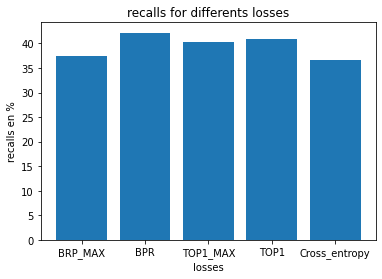

In [260]:
loss_names = ['BRP_MAX', 'BPR', 'TOP1_MAX', 'TOP1', 'Cross_entropy']
plt.bar(loss_names,recalls)
plt.xlabel('losses')
plt.ylabel('recalls en %')
plt.title('recalls for differents losses')
plt.savefig('recalls')
plt.show()

In [ ]:
MRRs =[result1[2][3]*100,result2[2][3]*100,result3[2][3]*100,result4[2][3]*100,result5[2][3]*100]

In [ ]:
loss_names = ['BRP_MAX', 'BPR', 'TOP1_MAX', 'TOP1', 'Cross_entropy']
plt.bar(loss_names,MRRs)
plt.xlabel('losses')
plt.ylabel('MRRs x 1E-1')
plt.title('MRRs for differents losses')
plt.savefig('MRR')
plt.show()

<img src="MRR.png"/>
Nous obtenons des résultas contraires à ceux des auteurs, les pertes BPR-max, TOP1-MAX ont des recall et des MRR inférieurs à ceux des TOP1 et BPR même si les différences ne sont pas très élévées. ceci nous permet de conclure que les nouvelles fonctions construites par les auteurs sont dépendentes du style d'échantillonnage.

Ensuite nous allons entrainé à nouveau le modèle sur des batchs de taille 500 et 1000 sur 2 époques.

In [19]:
batch_size = 500

In [20]:
loss_type = 'BPR-max'
final_act = 'tanh'

In [21]:
n_epochs = 2
if not is_eval: #training
        #Initialize the model
        model = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result1 = trainer.train(0, n_epochs - 1)

  0%|                                                                                        | 0/63158 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                          | 0/116 [00:00<?, ?it/s]<ipython-input-7-c5f494c83781>:11: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  hits = (targets == indices).nonzero()
  0%|                                                                                        | 0/63158 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0018, loss: 0.0018, recall: 0.3409, mrr: 0.1048, time: 1035.6925649642944
Start Epoch # 1


 75%|████████████████████████████████████████████████████████████▊                    | 87/116 [00:01<00:00, 77.78it/s]

Epoch: 1, train loss: 0.0018, loss: 0.0019, recall: 0.2916, mrr: 0.0792, time: 1037.907169342041


In [22]:
batch_size = 1000

In [23]:
n_epochs = 2
if not is_eval: #training
        #Initialize the model
        model = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result1 = trainer.train(0, n_epochs - 1)

  0%|                                                                                        | 0/31579 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                        | 0/31579 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0009, loss: 0.0009, recall: 0.3512, mrr: 0.0981, time: 940.8622348308563
Start Epoch # 1


 71%|█████████████████████████████████████████████████████████▉                        | 41/58 [00:00<00:00, 42.12it/s]

Epoch: 1, train loss: 0.0009, loss: 0.0009, recall: 0.3950, mrr: 0.1147, time: 941.6704943180084


Comme on s'y attendait, les temps d'exécution ont largement baissé. Les résultats obtenus ici avec ces tailles de batch (sur la BPR-MAX) ne sont pas très mauvais par rapport à ceux obtenus précédemment. On remarque que la performance du BPR-MAX s'améliore grandement ceci serait dû au fait qu'à défaut d'avoir des échantillons négatifs supplémentaires une taille de batch plus grande donne la possibilité au BPR-MAX d'avoir plus d'échantillons négatifs pertinents.

Pour vérifier cette thèse, nous allons entrainé avec une taille de batch 1000 la BPR et observer ses métriques de performances. Si elle se dégradent on pourra conclure qu'en lieu et place d'utiliser des échantillons négatifs supplementaires sur les BPR-MAX et TOP1-MAX on pourrait tout simplement considérer une taille de batch plus grande.

In [34]:
batch_size = 1000
loss_type = 'BPR'
final_act = 'tanh'

In [35]:
n_epochs = 2
if not is_eval: #training
        #Initialize the model
        model = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result1 = trainer.train(0, n_epochs - 1)

  0%|                                                                                        | 0/31579 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                        | 0/31579 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0009, loss: 0.0009, recall: 0.3695, mrr: 0.1076, time: 1129.8343074321747
Start Epoch # 1


 71%|█████████████████████████████████████████████████████████▉                        | 41/58 [00:00<00:00, 41.82it/s]

Epoch: 1, train loss: 0.0009, loss: 0.0009, recall: 0.4051, mrr: 0.1204, time: 1088.5993971824646


Ici nous challengeons les fonction d'activations terminales

In [24]:
final_act = 'softmax'
batch_size = 500

In [25]:
n_epochs = 2
if not is_eval: #training
        #Initialize the model
        model = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result6 = trainer.train(0, n_epochs - 1)

  0%|                                                                                        | 0/63158 [00:00<?, ?it/s]

#### START TRAINING....
Start Epoch # 0


<ipython-input-6-e59e7dc184cb>:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  logit = self.final_activation(self.h2o(output))
  0%|                                                                                        | 0/63158 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0020, loss: 0.0020, recall: 0.0075, mrr: 0.0027, time: 1130.7661967277527
Start Epoch # 1


 75%|████████████████████████████████████████████████████████████▊                    | 87/116 [00:00<00:00, 89.29it/s]

Epoch: 1, train loss: 0.0020, loss: 0.0020, recall: 0.0203, mrr: 0.0183, time: 1131.4820203781128


In [36]:
final_act ='softmax_logit'
loss_type = 'BPR-max'
batch_size = 500

In [37]:
n_epochs = 2
if not is_eval: #training
        #Initialize the model
        model = GRU4REC(input_size, hidden_size, output_size, final_act=final_act,
                            num_layers=num_layers, use_cuda=cuda, batch_size=batch_size,
                            dropout_input=dropout_input, dropout_hidden=dropout_hidden, embedding_dim=embedding_dim).to('cuda')
        #weights initialization
        #init_model(model)
        #optimizer
        optimizer = Optimizer(model.parameters(), optimizer_type=optimizer_type, lr=lr,
                                  weight_decay=weight_decay, momentum=momentum, eps=eps)
        #trainer class
        trainer = Trainer(model, train_data=train_data, eval_data=valid_data, optim=optimizer,
                              use_cuda=cuda, loss_func=loss_function, batch_size=batch_size,k_eval=k_eval)
        print('#### START TRAINING....')
        result6 = trainer.train(0, n_epochs - 1)

#### START TRAINING....
Start Epoch # 0


  0%|                                                                                        | 0/63158 [00:00<?, ?it/s]<ipython-input-6-e59e7dc184cb>:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logit = self.final_activation(self.h2o(output))
  0%|                                                                                        | 0/63158 [00:00<?, ?it/s]

Epoch: 0, train loss: 0.0026, loss: 0.0027, recall: 0.3179, mrr: 0.0868, time: 1138.622053861618
Start Epoch # 1


 75%|████████████████████████████████████████████████████████████▊                    | 87/116 [00:01<00:00, 74.16it/s]

Epoch: 1, train loss: 0.0026, loss: 0.0028, recall: 0.0985, mrr: 0.0220, time: 1140.4958963394165


On aboutit à la conclusion que la fonction TanH est la fonction optimale pour cette tâche.

## Conclusion <a class="anchor" id="conclusion"></a>


En sommes tout au long de ce travail nous avons analysé l'article **Recurrent Neural Networks with Top-k Gains for Session-based Recommendations** et menés quelques expérimentations basées sur leur algorithme. Dans nos expérimentations nous avons abouti à conclusion que les nouvelles fonctions de pertes proposées par les auteurs étaient dépendantes du style d'échantillonnage. Ainsi en lieu et place d'utiliser des échantillons négatifs supplémentaires, on pourrait augmenter la taille du batch pour avoir de meilleurs résultats (la taille de batch conseillée avec ce jeu de données lorsqu'il y'a des échantillons négatifs supplémentaires varie entre 35 et 50, en abscence de ces échantillons négatifs supplémentaires on pourrait la faire passer à 2000 par exemple).

Une amélioration qu'on pourrait aussi faire sur la TOP1-MAX est d'ajouter une coefficient de régularisation compris entre 0 et 1 sur la partie qui pénalise les échantillons négatifs. ceci va fortement baisser l'impact de ces derniers lors de l'apprentissage (surtout pour les moins pertinents)
$$ L_s^{TOP1-MAX} = \sum_{j=1}^{N_s}{s_j(\sigma(\hat r_{s,j} - \hat r_{s,i}) + \alpha \sigma(\hat r_{s,j}^2))} $$

Une limite de notre travail est que nous avions pas pû tester l'algorithme des auteurs sur d'autres dataset. Nous en avons pas trouvé open source. Un travail future serait de tester cet algorithme sur de nouveuax jeu de données.